# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


# Reading data

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

# Memory usage reduction

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

print("Train data")
train_data = reduce_mem_usage(train)
print("\nTest data")
test_data = reduce_mem_usage(test)


Train data
Mem. usage decreased to 220.49 Mb (49.8% reduction)

Test data
Mem. usage decreased to 109.48 Mb (50.0% reduction)


# Dropping row_id

In [ ]:
row_id_test = test["row_id"]
test.drop("row_id", axis = 1, inplace = True)

In [ ]:
row_id_train = train["row_id"]
train.drop("row_id", axis = 1, inplace = True)

In [ ]:
train.head()

A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   
1 -9.536743e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760 -0.000200   
2 -9.536743e-07 -0.000002  0.000007  0.000129  0.000268  0.000270  0.000243   
3  4.632568e-08 -0.000006  0.000012  0.000245  0.000492  0.000522  0.000396   
4 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   

   A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  A8T1G1C0  \
0 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043 -0.000086 -0.000086   
1 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043  0.000914  0.000914   
2  0.000125  0.000001 -0.000007  ...  0.000084  0.000048  0.000081  0.000106   
3  0.000197 -0.000003 -0.000007  ...  0.000151  0.000100  0.000180  0.000202   
4 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043 -0.000086 -0.000086   

   A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0  \
0 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   
1 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   
2  0.000072  0.000010  0.000008  0.000019  1.046326e-06   
3  0.000153  0.000021  0.000015  0.000046 -9.536743e-07   
4 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   

                   target  
0  Streptococcus_pyogenes  
1     Salmonella_enterica  
2     Salmonella_enterica  
3     Salmonella_enterica  
4      Enterococcus_hirae  

[5 rows x 287 columns]

In [ ]:
test.head()

A0T0G0C10  A0T0G1C9      A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0 -9.536743e-07 -0.000002 -9.153442e-07  0.000024  0.000034 -0.000002   
1 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114  0.001800 -0.000240   
2  4.632568e-08  0.000003  8.465576e-08 -0.000014  0.000007 -0.000005   
3 -9.536743e-07 -0.000008  8.084656e-06  0.000216  0.000420  0.000514   
4 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  \
0  0.000021  0.000024 -0.000009 -0.000008  ...  0.000039  0.000085  0.000055   
1  0.001800 -0.000114  0.000957 -0.000010  ... -0.000043  0.000914 -0.000043   
2 -0.000004  0.000003  0.000004 -0.000008  ...  0.000041  0.000102  0.000084   
3  0.000452  0.000187 -0.000005 -0.000008  ...  0.000069  0.000158  0.000098   
4 -0.000200 -0.000114 -0.000043 -0.000010  ... -0.000043 -0.000086 -0.000043   

   A8T1G0C1  A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0  
0  0.000108  0.000090  0.000059  0.000010  0.000006  0.000027  4.632568e-08  
1 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07  
2  0.000111  0.000117  0.000070  0.000020  0.000030  0.000021  4.632568e-08  
3  0.000175  0.000217  0.000150  0.000018  0.000016  0.000051 -9.536743e-07  
4 -0.000086  0.000914 -0.000043 -0.000010 -0.000010  0.000990 -9.536743e-07  

[5 rows x 286 columns]

# Duplicate Value removing

In [ ]:
print(f"Total number of duplicated rows: {train.duplicated().sum()} out of {train.shape[0]} ({train.duplicated().sum()/train.shape[0]*100:.2f}%)")
train_data = train.drop_duplicates()
print(f"Total number of rows after removal: {train_data.shape[0]}")

Total number of duplicated rows: 0 out of 200000 (0.00%)
Total number of rows after removal: 200000


# Finding Missing Values

In [ ]:
for i in range(train.shape[1]):
    n_miss = train.iloc[:, i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (train.columns[i], n_miss, perc))


> row_id, Missing: 0 (0.0%)
> A0T0G0C10, Missing: 0 (0.0%)
> A0T0G1C9, Missing: 0 (0.0%)
> A0T0G2C8, Missing: 0 (0.0%)
> A0T0G3C7, Missing: 0 (0.0%)
> A0T0G4C6, Missing: 0 (0.0%)
> A0T0G5C5, Missing: 0 (0.0%)
> A0T0G6C4, Missing: 0 (0.0%)
> A0T0G7C3, Missing: 0 (0.0%)
> A0T0G8C2, Missing: 0 (0.0%)
> A0T0G9C1, Missing: 0 (0.0%)
> A0T0G10C0, Missing: 0 (0.0%)
> A0T1G0C9, Missing: 0 (0.0%)
> A0T1G1C8, Missing: 0 (0.0%)
> A0T1G2C7, Missing: 0 (0.0%)
> A0T1G3C6, Missing: 0 (0.0%)
> A0T1G4C5, Missing: 0 (0.0%)
> A0T1G5C4, Missing: 0 (0.0%)
> A0T1G6C3, Missing: 0 (0.0%)
> A0T1G7C2, Missing: 0 (0.0%)
> A0T1G8C1, Missing: 0 (0.0%)
> A0T1G9C0, Missing: 0 (0.0%)
> A0T2G0C8, Missing: 0 (0.0%)
> A0T2G1C7, Missing: 0 (0.0%)
> A0T2G2C6, Missing: 0 (0.0%)
> A0T2G3C5, Missing: 0 (0.0%)
> A0T2G4C4, Missing: 0 (0.0%)
> A0T2G5C3, Missing: 0 (0.0%)
> A0T2G6C2, Missing: 0 (0.0%)
> A0T2G7C1, Missing: 0 (0.0%)
> A0T2G8C0, Missing: 0 (0.0%)
> A0T3G0C7, Missing: 0 (0.0%)
> A0T3G1C6, Missing: 0 (0.0%)
> A0T3G2C5

In [ ]:
for i in range(test.shape[1]):
    n_miss = test.iloc[:, i].isnull().sum()
    perc = n_miss / test.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (test.columns[i], n_miss, perc))

> A0T0G0C10, Missing: 0 (0.0%)
> A0T0G1C9, Missing: 0 (0.0%)
> A0T0G2C8, Missing: 0 (0.0%)
> A0T0G3C7, Missing: 0 (0.0%)
> A0T0G4C6, Missing: 0 (0.0%)
> A0T0G5C5, Missing: 0 (0.0%)
> A0T0G6C4, Missing: 0 (0.0%)
> A0T0G7C3, Missing: 0 (0.0%)
> A0T0G8C2, Missing: 0 (0.0%)
> A0T0G9C1, Missing: 0 (0.0%)
> A0T0G10C0, Missing: 0 (0.0%)
> A0T1G0C9, Missing: 0 (0.0%)
> A0T1G1C8, Missing: 0 (0.0%)
> A0T1G2C7, Missing: 0 (0.0%)
> A0T1G3C6, Missing: 0 (0.0%)
> A0T1G4C5, Missing: 0 (0.0%)
> A0T1G5C4, Missing: 0 (0.0%)
> A0T1G6C3, Missing: 0 (0.0%)
> A0T1G7C2, Missing: 0 (0.0%)
> A0T1G8C1, Missing: 0 (0.0%)
> A0T1G9C0, Missing: 0 (0.0%)
> A0T2G0C8, Missing: 0 (0.0%)
> A0T2G1C7, Missing: 0 (0.0%)
> A0T2G2C6, Missing: 0 (0.0%)
> A0T2G3C5, Missing: 0 (0.0%)
> A0T2G4C4, Missing: 0 (0.0%)
> A0T2G5C3, Missing: 0 (0.0%)
> A0T2G6C2, Missing: 0 (0.0%)
> A0T2G7C1, Missing: 0 (0.0%)
> A0T2G8C0, Missing: 0 (0.0%)
> A0T3G0C7, Missing: 0 (0.0%)
> A0T3G1C6, Missing: 0 (0.0%)
> A0T3G2C5, Missing: 0 (0.0%)
> A0T3G3

# Unique Bacteria name from  Target column

In [ ]:
train['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

# Frequency Histogram of target column

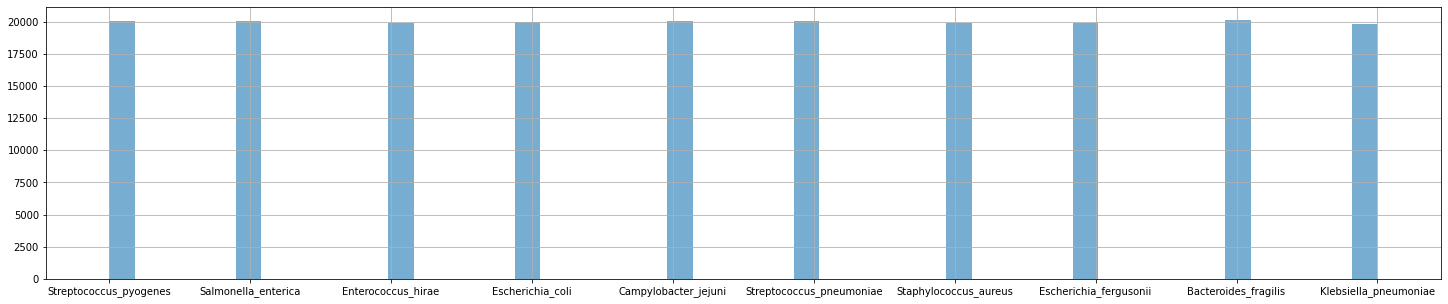

In [ ]:
train['target'].hist(bins=50,figsize=(25,5),alpha=0.6)
plt.show()

In [ ]:
train['target'].value_counts()

Bacteroides_fragilis        20139
Streptococcus_pyogenes      20076
Streptococcus_pneumoniae    20074
Campylobacter_jejuni        20063
Salmonella_enterica         20030
Escherichia_coli            19958
Enterococcus_hirae          19947
Escherichia_fergusonii      19937
Staphylococcus_aureus       19929
Klebsiella_pneumoniae       19847
Name: target, dtype: int64

In [ ]:
percentage=(train['target'].value_counts()*100)/200000

# Percentage of unique value in the dataset

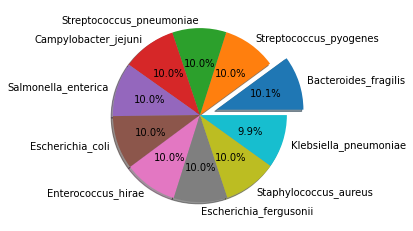

In [ ]:
val = np.array(percentage)
mylabels = ['Bacteroides_fragilis',
'Streptococcus_pyogenes',      
'Streptococcus_pneumoniae',    
'Campylobacter_jejuni',        
'Salmonella_enterica',        
'Escherichia_coli',            
'Enterococcus_hirae',          
'Escherichia_fergusonii',      
'Staphylococcus_aureus',      
'Klebsiella_pneumoniae',]
myexplode = [0.2,0,0,0,0,0,0,0,0,0]

plt.pie(val, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.show() 

# Outlier for training data

In [ ]:
df1= train.drop(["target"], axis = 1)
y1=train["target"]
for i in df1:
  print(i)
  upper_quartile = train[i].mean() + 3*train[i].std()
  lower_quartile = train[i].mean() - 3*train[i].std()
  print("Highest allowed: ", upper_quartile)
  print("Lowest allowed: ", lower_quartile)
  outliers = train[(train[i] > upper_quartile) | (train[i] < lower_quartile)]
  print(outliers.shape[0])

A0T0G0C10
Highest allowed:  0.0002602527413273492
Lowest allowed:  -0.0002589687471754587
112
A0T0G1C9
Highest allowed:  0.000391811677673104
Lowest allowed:  -0.00039796293322069687
198
A0T0G2C8
Highest allowed:  0.0008455673305434175
Lowest allowed:  -0.0008741610145079903
852
A0T0G3C7
Highest allowed:  0.001297237268772733
Lowest allowed:  -0.0013167049864932778
821
A0T0G4C6
Highest allowed:  0.002055324424418359
Lowest allowed:  -0.0020455031922210765
1144
A0T0G5C5
Highest allowed:  0.002632814404933015
Lowest allowed:  -0.002581864766398212
1819
A0T0G6C4
Highest allowed:  0.002339350210604607
Lowest allowed:  -0.002310750855031074
1648
A0T0G7C3
Highest allowed:  0.0013131235509717953
Lowest allowed:  -0.0013320674870556104
965
A0T0G8C2
Highest allowed:  0.0002932865718321409
Lowest allowed:  -0.0003485456145426724
656
A0T0G9C1
Highest allowed:  0.00024211108257077285
Lowest allowed:  -0.0002571677191554045
98
A0T0G10C0
Highest allowed:  1.4661048055586434e-05
Lowest allowed:  -1.6

In [ ]:
df1= train.drop(["target"], axis = 1)

# Visualizing Outlier

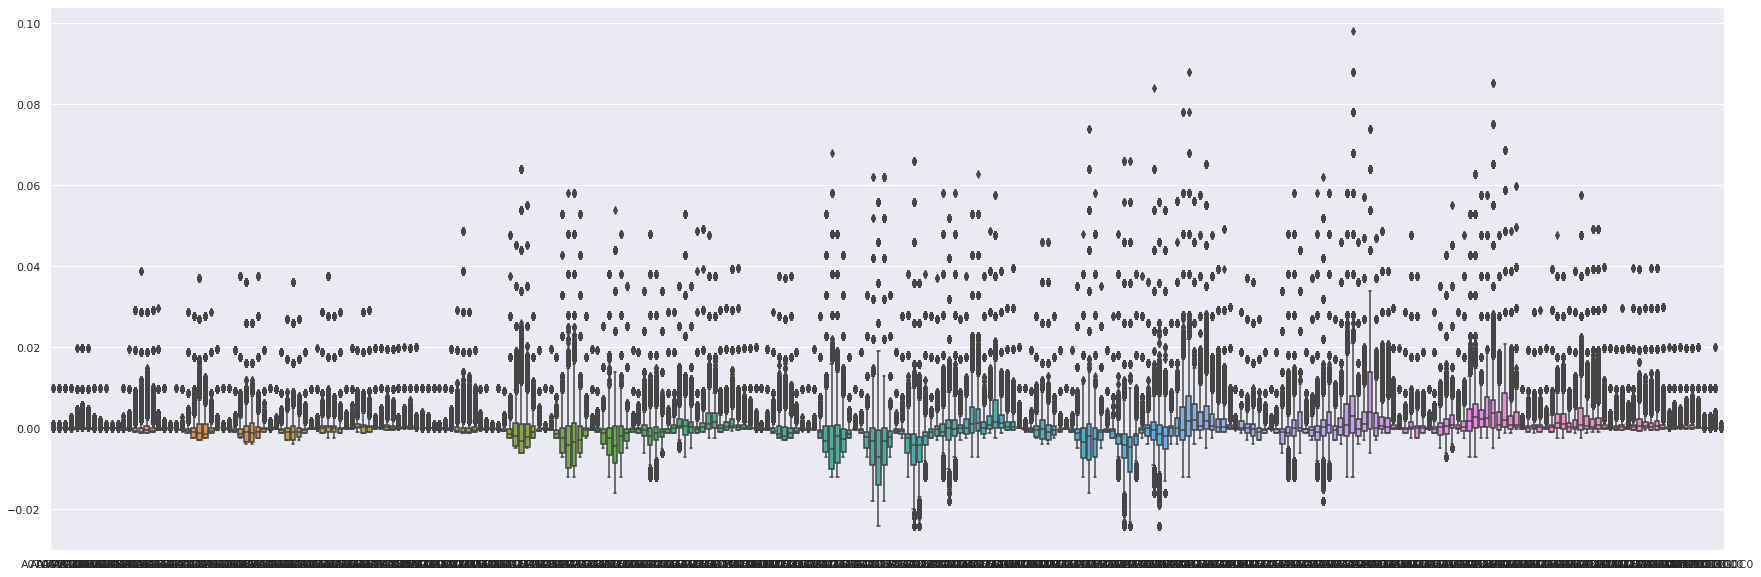

In [ ]:
sns.set(rc={"figure.figsize":(30, 10)})
boxplot = sns.boxplot(data=df1)

# Heatmap

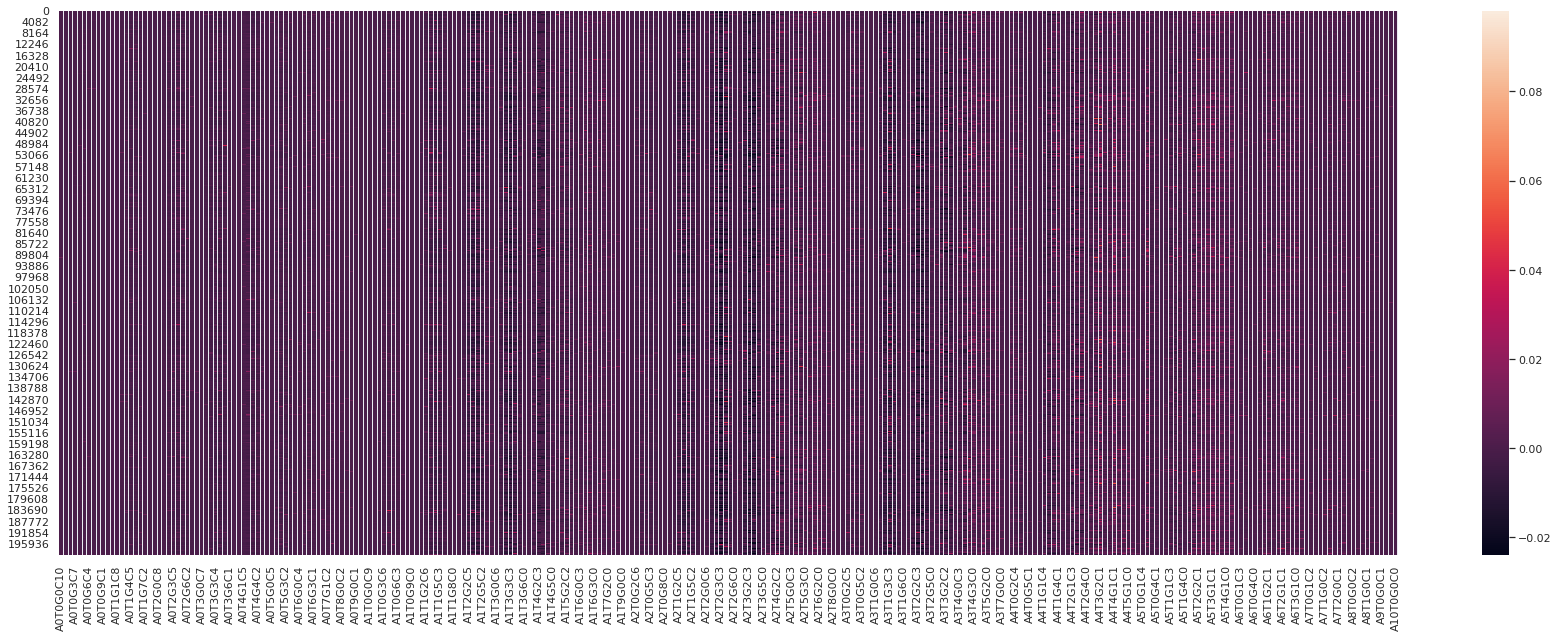

In [ ]:
ax=sns.heatmap(df1)

In [ ]:
for j in df1:
     out = pd.concat([outliers]).drop_duplicates()
     df1[j].drop(out.index, axis=0, inplace=True)

# Scatter Plot for correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

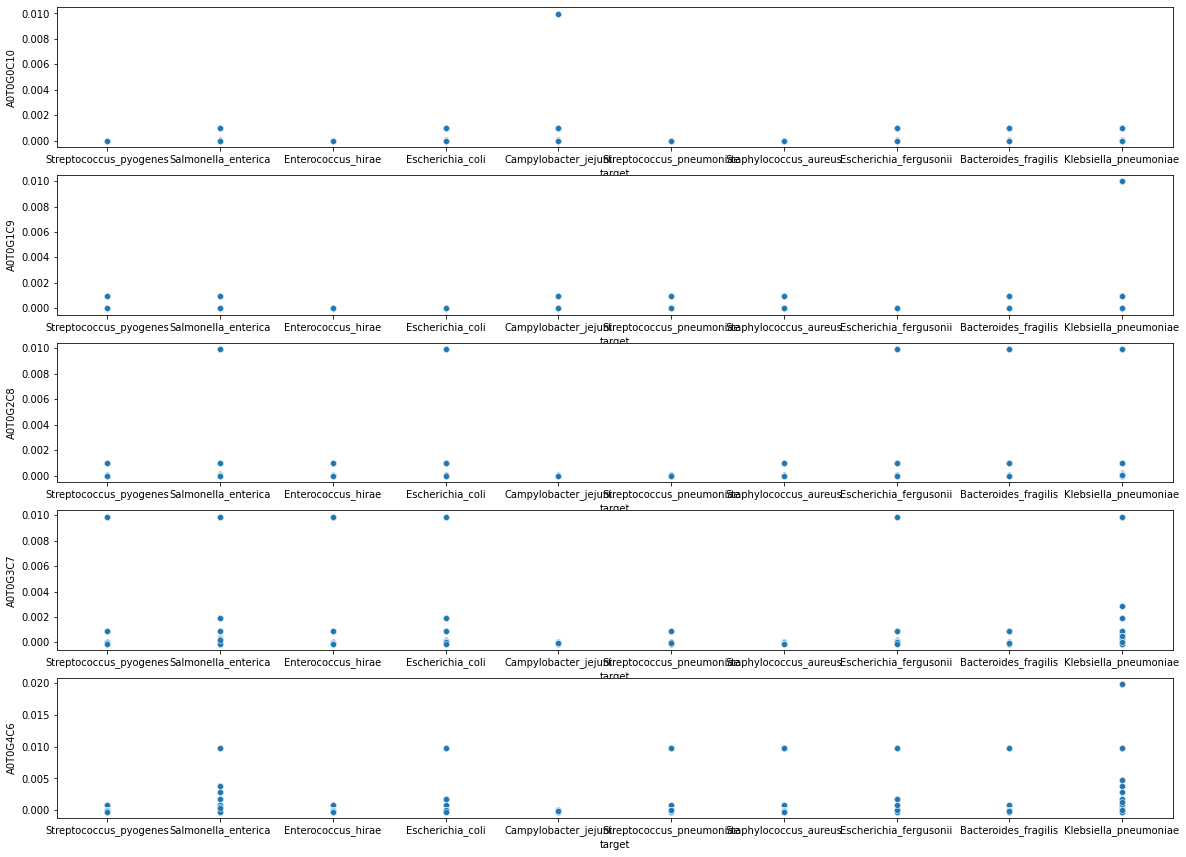

In [ ]:

col=train.columns
count=1
plt.subplots(figsize=(20, 18))
for i in col:
    plt.subplot(6,1,count)
    sns.scatterplot(train["target"],train[i])
    count+=1
    if count==6:
      break

plt.show()

In [ ]:
print(train.shape)

(200000, 287)


In [ ]:
train.describe()

A0T0G0C10       A0T0G1C9       A0T0G2C8       A0T0G3C7  \
count  2.000000e+05  200000.000000  200000.000000  200000.000000   
mean   6.421457e-07      -0.000003      -0.000014      -0.000010   
std    8.654927e-05       0.000132       0.000287       0.000436   
min   -9.536743e-07      -0.000010      -0.000043      -0.000114   
25%   -9.536743e-07      -0.000010      -0.000043      -0.000114   
50%   -9.536743e-07      -0.000010      -0.000043      -0.000114   
75%   -9.536743e-07      -0.000003      -0.000013      -0.000004   
max    9.999046e-03       0.009990       0.009957       0.009886   

            A0T0G4C6       A0T0G5C5       A0T0G6C4       A0T0G7C3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.000005       0.000025       0.000014      -0.000009   
std         0.000683       0.000869       0.000775       0.000441   
min        -0.000200      -0.000240      -0.000200      -0.000114   
25%        -0.000200      -0.000240      -0.000200      -0.000114   
50%        -0.000200      -0.000237      -0.000199      -0.000114   
75%        -0.000011       0.000003      -0.000030       0.000004   
max         0.019800       0.019760       0.019800       0.009886   

            A0T0G8C2       A0T0G9C1  ...       A8T0G0C2       A8T0G1C1  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       -0.000028      -0.000008  ...       0.000135       0.000348   
std         0.000107       0.000083  ...       0.000711       0.001117   
min        -0.000043      -0.000010  ...      -0.000043      -0.000086   
25%        -0.000043      -0.000010  ...      -0.000043      -0.000086   
50%        -0.000043      -0.000010  ...       0.000014       0.000064   
75%        -0.000028      -0.000010  ...       0.000111       0.000463   
max         0.009957       0.009990  ...       0.019957       0.019914   

            A8T0G2C0       A8T1G0C1       A8T1G1C0       A8T2G0C0  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.000253       0.000464       0.000581       0.000379   
std         0.000914       0.001238       0.001528       0.001182   
min        -0.000043      -0.000086      -0.000086      -0.000043   
25%        -0.000043      -0.000086      -0.000086      -0.000043   
50%         0.000047       0.000124       0.000114       0.000043   
75%         0.000297       0.000684       0.000774       0.000365   
max         0.019957       0.019914       0.019914       0.019957   

            A9T0G0C1      A9T0G1C0      A9T1G0C0     A10T0G0C0  
count  200000.000000  2.000000e+05  2.000000e+05  2.000000e+05  
mean        0.000062  8.982134e-05  1.170014e-04  2.215407e-07  
std         0.000466  5.475606e-04  6.788277e-04  2.050081e-05  
min        -0.000010 -9.536743e-06 -9.536743e-06 -9.536743e-07  
25%        -0.000010 -9.536743e-06 -9.536743e-06 -9.536743e-07  
50%        -0.000010  4.632568e-07  4.632568e-07 -9.536743e-07  
75%         0.000030  6.046326e-05  6.946326e-05 -9.536743e-07  
max         0.009990  9.990463e-03  1.999046e-02  9.990463e-04  

[8 rows x 286 columns]

In [ ]:
train.groupby("target").describe()

A0T0G0C10                                            \
                             count          mean           std           min   
target                                                                         
Bacteroides_fragilis       20139.0 -1.343019e-09  2.442821e-05 -9.536743e-07   
Campylobacter_jejuni       20063.0  1.077368e-05  2.682630e-04 -9.536743e-07   
Enterococcus_hirae         19947.0 -8.997314e-07  2.259107e-07 -9.536743e-07   
Escherichia_coli           19958.0 -4.004626e-07  2.002817e-05 -9.536743e-07   
Escherichia_fergusonii     19937.0 -1.439236e-07  2.127481e-05 -9.536743e-07   
Klebsiella_pneumoniae      19847.0 -1.151681e-08  2.460516e-05 -9.536743e-07   
Salmonella_enterica        20030.0 -2.352020e-07  2.343929e-05 -9.536743e-07   
Staphylococcus_aureus      19929.0 -8.974246e-07  2.304090e-07 -9.536743e-07   
Streptococcus_pneumoniae   20074.0 -8.983291e-07  2.286586e-07 -9.536743e-07   
Streptococcus_pyogenes     20076.0 -8.980856e-07  2.291316e-07 -9.536743e-07   

                                                                    \
                                   25%           50%           75%   
target                                                               
Bacteroides_fragilis     -9.536743e-07 -9.536743e-07 -9.536743e-07   
Campylobacter_jejuni     -9.536743e-07 -9.536743e-07  3.046326e-06   
Enterococcus_hirae       -9.536743e-07 -9.536743e-07 -9.536743e-07   
Escherichia_coli         -9.536743e-07 -9.536743e-07 -9.536743e-07   
Escherichia_fergusonii   -9.536743e-07 -9.536743e-07 -9.536743e-07   
Klebsiella_pneumoniae    -9.536743e-07 -9.536743e-07 -9.536743e-07   
Salmonella_enterica      -9.536743e-07 -9.536743e-07 -9.536743e-07   
Staphylococcus_aureus    -9.536743e-07 -9.536743e-07 -9.536743e-07   
Streptococcus_pneumoniae -9.536743e-07 -9.536743e-07 -9.536743e-07   
Streptococcus_pyogenes   -9.536743e-07 -9.536743e-07 -9.536743e-07   

                                       A0T0G1C9            ...  A9T1G0C0  \
                                   max    count      mean  ...       75%   
target                                                     ...             
Bacteroides_fragilis      9.990463e-04  20139.0 -0.000005  ...  0.000072   
Campylobacter_jejuni      9.999046e-03  20063.0 -0.000004  ...  0.000411   
Enterococcus_hirae        4.632568e-08  19947.0 -0.000006  ...  0.000280   
Escherichia_coli          9.990463e-04  19958.0 -0.000006  ...  0.000030   
Escherichia_fergusonii    9.990463e-04  19937.0 -0.000006  ...  0.000036   
Klebsiella_pneumoniae     9.990463e-04  19847.0  0.000016  ...  0.000026   
Salmonella_enterica       9.990463e-04  20030.0 -0.000004  ...  0.000037   
Staphylococcus_aureus     4.632568e-08  19929.0 -0.000006  ...  0.000130   
Streptococcus_pneumoniae  4.632568e-08  20074.0 -0.000005  ...  0.000080   
Streptococcus_pyogenes    4.632568e-08  20076.0 -0.000005  ...  0.000098   

                                  A10T0G0C0                              \
                              max     count          mean           std   
target                                                                    
Bacteroides_fragilis      0.00999   20139.0 -4.038456e-07  1.591216e-06   
Campylobacter_jejuni      0.01999   20063.0 -4.816612e-07  1.346655e-06   
Enterococcus_hirae        0.00999   19947.0  4.787740e-06  5.300511e-05   
Escherichia_coli          0.00999   19958.0 -8.179894e-07  3.424623e-07   
Escherichia_fergusonii    0.00999   19937.0 -8.160408e-07  3.445236e-07   
Klebsiella_pneumoniae     0.00999   19847.0 -7.570199e-07  6.382867e-07   
Salmonella_enterica       0.00999   20030.0 -5.488316e-07  1.243529e-06   
Staphylococcus_aureus     0.00999   19929.0 -8.135268e-07  3.471487e-07   
Streptococcus_pneumoniae  0.00999   20074.0  2.580649e-06  3.680675e-05   
Streptococcus_pyogenes    0.00999   20076.0 -5.167845e-07  1.380726e-06   

                                                                    \
                                   min

In [ ]:
X = train.drop("target", axis = 1)
y = train["target"]
dc=train.copy()

In [ ]:
y

0           Streptococcus_pyogenes
1              Salmonella_enterica
2              Salmonella_enterica
3              Salmonella_enterica
4               Enterococcus_hirae
                    ...           
199995         Salmonella_enterica
199996      Streptococcus_pyogenes
199997    Streptococcus_pneumoniae
199998       Staphylococcus_aureus
199999       Klebsiella_pneumoniae
Name: target, Length: 200000, dtype: object

# Encoding categorical value(target)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[9 6 6 ... 8 7 5]


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


# Normalizing data

In [ ]:
normalized_arr = preprocessing.normalize([y])

In [ ]:
print(normalized_arr.shape)

(1, 200000)


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
rs = preprocessing.RobustScaler()
X=rs.fit_transform(X)

# Scaling and transforming data

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# logistic regression,solver=liblinear,c=1

In [ ]:
log_reg1 = LogisticRegression(multi_class = "ovr", max_iter = 1000,solver='liblinear', penalty='l1' , C=1.0)

In [ ]:
log_reg1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(max_iter=1000, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred = log_reg1.predict(X_test)

In [ ]:
prediction = list(map(round,y_pred))
print(prediction)

[5, 5, 1, 7, 4, 2, 4, 9, 2, 3, 2, 7, 9, 5, 3, 2, 8, 9, 5, 5, 2, 7, 3, 8, 7, 3, 3, 8, 6, 8, 2, 3, 8, 2, 3, 0, 2, 8, 8, 4, 2, 4, 1, 6, 2, 6, 9, 0, 3, 5, 5, 0, 2, 4, 5, 4, 3, 0, 5, 2, 0, 8, 6, 9, 1, 0, 2, 8, 6, 4, 6, 8, 5, 8, 7, 6, 1, 3, 9, 5, 8, 6, 7, 3, 4, 9, 5, 6, 5, 1, 6, 9, 8, 7, 6, 8, 8, 9, 7, 3, 2, 4, 1, 7, 4, 8, 6, 6, 9, 2, 4, 3, 7, 5, 6, 7, 4, 9, 1, 1, 4, 0, 3, 8, 0, 6, 9, 0, 0, 7, 6, 5, 7, 0, 7, 3, 8, 4, 3, 9, 9, 1, 8, 7, 8, 1, 4, 0, 2, 3, 3, 3, 3, 0, 1, 0, 5, 9, 5, 6, 5, 9, 7, 2, 0, 9, 4, 8, 4, 3, 9, 3, 4, 6, 4, 4, 6, 5, 8, 7, 3, 4, 7, 3, 4, 7, 6, 1, 0, 1, 4, 8, 5, 7, 2, 6, 2, 6, 8, 5, 4, 9, 0, 1, 1, 1, 0, 7, 3, 9, 7, 7, 7, 3, 8, 9, 4, 9, 7, 8, 7, 2, 2, 8, 6, 0, 1, 3, 0, 5, 7, 8, 1, 1, 8, 7, 5, 0, 0, 3, 2, 8, 1, 8, 9, 5, 5, 7, 2, 3, 2, 6, 7, 3, 8, 8, 1, 2, 5, 2, 5, 2, 3, 6, 1, 5, 8, 3, 1, 5, 4, 1, 9, 9, 2, 5, 6, 3, 4, 5, 4, 3, 3, 1, 1, 9, 6, 6, 6, 7, 6, 0, 6, 2, 2, 8, 3, 5, 9, 9, 2, 2, 3, 1, 6, 3, 2, 7, 0, 2, 6, 4, 6, 2, 9, 2, 3, 8, 7, 5, 4, 2, 1, 8, 1, 7, 4, 6, 7, 7, 2, 2, 8, 

In [ ]:
print('\033[1;35;1mActual class :\033[0m', list(y_test))
print('\033[1;35;1mPredicted class:\033[0m ', prediction)

# Confusion Matrix

In [ ]:
cm = confusion_matrix (y_test, prediction)
print(cm)

[[5069   72  150   52   76   14  102   66  248  124]
 [  40 5311  127    4    2    0  122  336   28   37]
 [ 472   83 4620   11   29    2   15   93  259  457]
 [ 117   33   28 4114 1197   68  387   39   34   21]
 [ 113   51   44  936 4521   47  240   13   36   12]
 [  31   11    9   60   31 5615   65    3    4    2]
 [  96   55   32  717  316  267 4485   15   35   15]
 [  29  180   85    2    8    1   12 5606   35  108]
 [ 530   58  193   24   49    3   17   83 4717  310]
 [ 412   64  302   18   41    3    7  166  369 4632]]


In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y_test, y_pred))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y_test, y_pred,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y_test, y_pred,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y_test, y_pred,average='macro'))


Accuracy:  0.8115

Precision:  0.8128320299417504

Recall:  0.8119790792269994

F1 Score:  0.8114513100680247


In [ ]:
y_pred_train = log_reg1.predict(X_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Training Accuracy:  0.81645


In [ ]:
pred=log_reg1.predict_proba(X_test)
auc=metrics.roc_auc_score(y_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc)


Area Under Curve:  0.9683393097846693


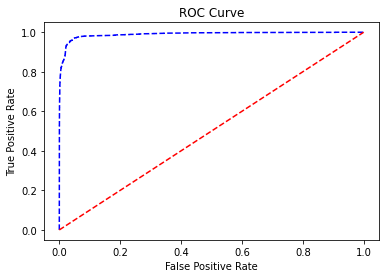

In [ ]:
y_pred_proba = log_reg1.predict_proba(X_test)[::,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
logloss = log_loss(y_test, log_reg1.predict_proba(X_test))
logloss

0.7568786370625423

# logistic regression,solver=lbfgs,c-0.1

In [ ]:
log_reg2 = LogisticRegression(multi_class = "multinomial", max_iter = 1000,solver='lbfgs', penalty='l2' , C=0.1)

In [ ]:
log_reg2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = log_reg2.predict(X_test)

In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y_test, y_pred))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y_test, y_pred,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y_test, y_pred,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y_test, y_pred,average='macro'))


Accuracy:  0.86815

Precision:  0.8689284407092129

Recall:  0.8684197070612181

F1 Score:  0.8683549937552133


In [ ]:
pred=log_reg2.predict_proba(X_test)
auc=metrics.roc_auc_score(y_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc)


Area Under Curve:  0.986519866934336


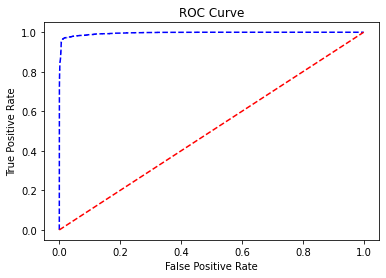

In [ ]:
y_pred_proba = log_reg2.predict_proba(X_test)[::,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Logistic regression,solver=lbfgs,c=10

In [ ]:
log_reg3 = LogisticRegression(multi_class = "multinomial", max_iter = 1000,solver='lbfgs', penalty='l2' , C=10)

In [ ]:
log_reg3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10, max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = log_reg3.predict(X_test)

In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y_test, y_pred))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y_test, y_pred,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y_test, y_pred,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y_test, y_pred,average='macro'))


Accuracy:  0.8779333333333333

Precision:  0.8781445393305564

Recall:  0.8781920343996598

F1 Score:  0.8780474333920161


In [ ]:
pred=log_reg3.predict_proba(X_test)
auc=metrics.roc_auc_score(y_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc)


Area Under Curve:  0.9882599286873142


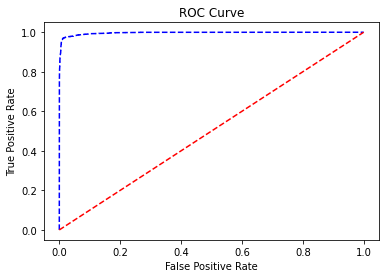

In [ ]:
y_pred_proba = log_reg3.predict_proba(X_test)[::,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Logistic regression,solver=lbfgs,c=1

In [ ]:
log_reg = LogisticRegression(multi_class = "multinomial", max_iter = 1000,solver='lbfgs', penalty='l2' , C=1.0)

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

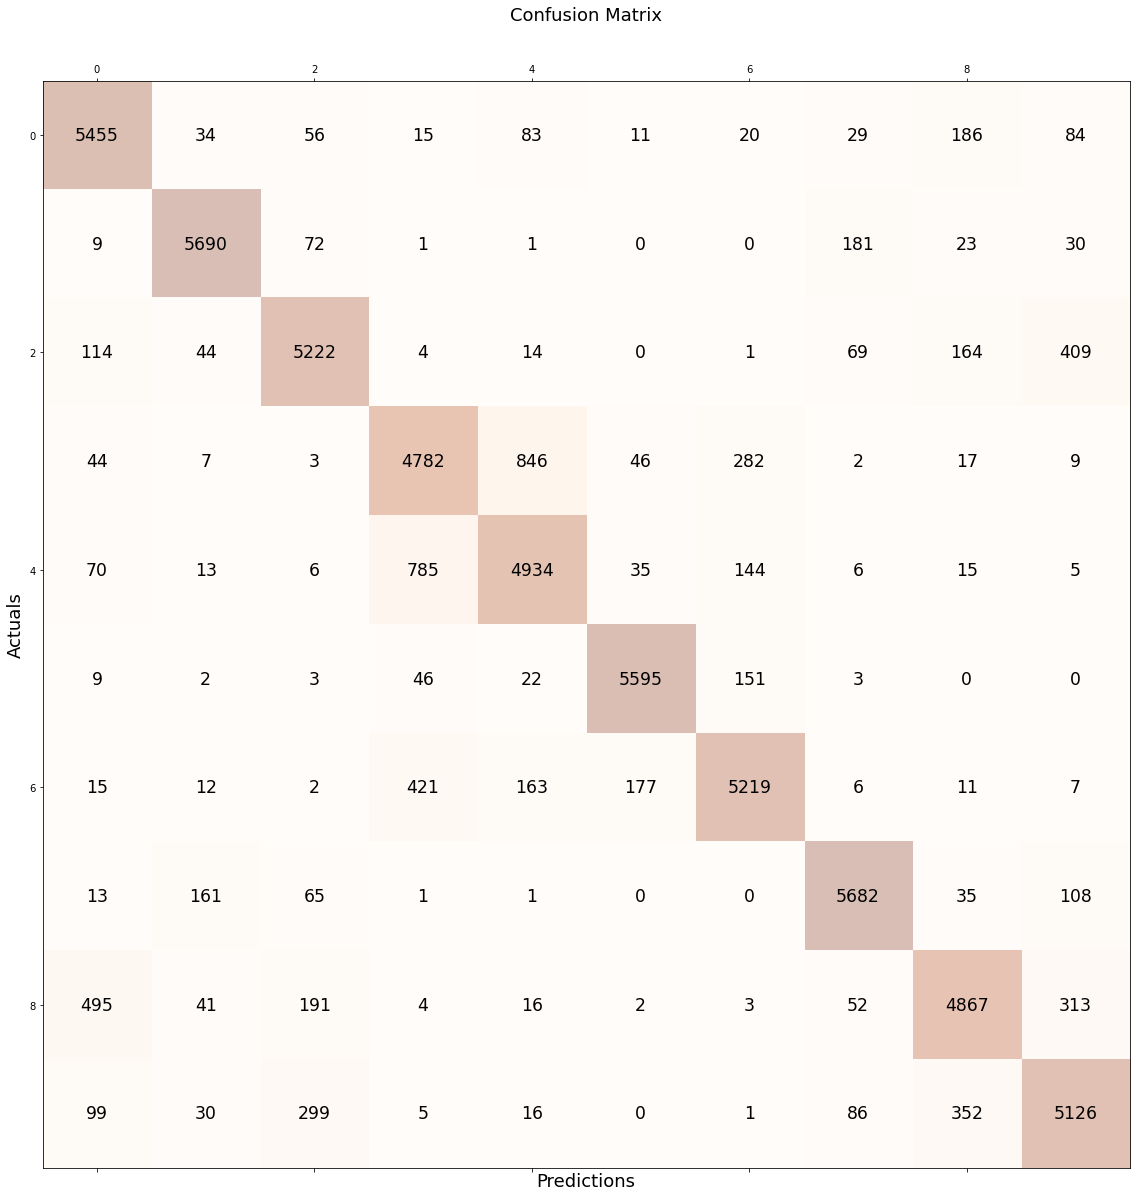

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
prediction = list(map(round,y_pred))
print(prediction)

[5, 5, 1, 7, 4, 2, 4, 9, 2, 3, 2, 7, 9, 5, 3, 2, 8, 9, 5, 5, 2, 7, 3, 8, 7, 4, 4, 8, 6, 0, 2, 3, 8, 2, 3, 2, 2, 8, 8, 4, 2, 4, 1, 6, 2, 6, 9, 8, 3, 5, 5, 0, 2, 4, 5, 4, 3, 3, 5, 2, 0, 4, 6, 9, 1, 0, 2, 8, 6, 4, 6, 8, 5, 8, 4, 1, 1, 3, 9, 5, 8, 6, 7, 3, 4, 9, 5, 6, 5, 1, 3, 9, 8, 7, 6, 8, 8, 9, 7, 4, 8, 3, 1, 7, 3, 8, 6, 6, 9, 2, 3, 3, 7, 5, 6, 7, 4, 9, 1, 1, 4, 0, 3, 8, 0, 5, 9, 0, 0, 7, 6, 5, 7, 9, 7, 6, 8, 3, 3, 9, 9, 1, 8, 7, 8, 1, 4, 0, 2, 4, 3, 4, 3, 0, 1, 9, 5, 2, 5, 6, 5, 9, 7, 2, 0, 9, 4, 8, 4, 3, 9, 3, 4, 6, 4, 4, 6, 5, 8, 7, 4, 4, 7, 3, 8, 7, 4, 1, 0, 1, 3, 8, 5, 7, 2, 6, 2, 6, 8, 5, 4, 0, 0, 1, 1, 1, 0, 7, 9, 9, 7, 8, 7, 6, 8, 9, 4, 9, 7, 8, 7, 2, 2, 8, 6, 0, 1, 3, 0, 5, 7, 8, 1, 1, 8, 7, 6, 0, 0, 3, 2, 8, 1, 0, 9, 5, 5, 2, 2, 3, 7, 6, 7, 3, 8, 8, 1, 2, 5, 2, 5, 2, 3, 6, 1, 5, 8, 3, 1, 5, 3, 1, 9, 9, 2, 5, 4, 3, 4, 5, 4, 3, 3, 1, 1, 9, 1, 6, 4, 7, 6, 0, 6, 2, 2, 8, 4, 5, 9, 9, 2, 2, 3, 1, 6, 6, 2, 7, 0, 2, 6, 4, 6, 2, 9, 2, 6, 8, 7, 5, 0, 2, 0, 8, 1, 7, 4, 6, 7, 7, 2, 0, 8, 

In [ ]:
print('\033[1;35;1mActual class :\033[0m', list(y_test))
print('\033[1;35;1mPredicted class:\033[0m ', prediction)

Actual class : [5, 5, 1, 7, 4, 2, 4, 9, 2, 3, 2, 7, 9, 5, 3, 2, 8, 9, 5, 5, 2, 7, 3, 8, 7, 0, 3, 8, 6, 8, 2, 3, 8, 2, 3, 2, 2, 8, 8, 4, 2, 4, 1, 6, 2, 3, 9, 0, 3, 5, 5, 0, 2, 4, 5, 4, 4, 4, 5, 2, 0, 3, 6, 9, 1, 0, 2, 8, 6, 4, 6, 8, 5, 8, 3, 1, 1, 3, 9, 5, 8, 6, 7, 3, 6, 9, 5, 6, 5, 1, 6, 9, 8, 7, 6, 0, 8, 2, 7, 4, 8, 3, 1, 7, 6, 8, 6, 6, 2, 8, 3, 4, 7, 5, 6, 7, 4, 9, 1, 1, 4, 0, 4, 8, 0, 6, 9, 0, 8, 7, 6, 5, 7, 9, 7, 6, 8, 4, 4, 9, 9, 1, 8, 7, 8, 1, 4, 0, 2, 4, 3, 3, 3, 0, 1, 8, 5, 2, 5, 6, 5, 9, 7, 2, 0, 9, 4, 8, 4, 3, 9, 3, 4, 6, 4, 4, 6, 6, 8, 7, 4, 4, 2, 4, 8, 7, 3, 1, 0, 1, 3, 8, 5, 7, 0, 6, 2, 6, 8, 6, 4, 0, 0, 1, 1, 1, 0, 7, 7, 2, 7, 8, 7, 6, 8, 9, 4, 9, 7, 8, 7, 2, 2, 8, 6, 0, 1, 4, 0, 5, 7, 8, 8, 1, 9, 7, 6, 0, 0, 3, 2, 8, 1, 0, 9, 5, 5, 7, 2, 3, 7, 6, 7, 4, 8, 8, 7, 2, 5, 2, 5, 2, 3, 6, 1, 5, 8, 3, 2, 5, 3, 1, 2, 9, 9, 5, 6, 3, 4, 5, 4, 3, 3, 1, 1, 9, 1, 5, 4, 7, 6, 0, 6, 8, 2, 8, 3, 5, 9, 8, 2, 8, 3, 1, 6, 6, 2, 7, 0, 2, 6, 4, 6, 2, 9, 2, 6, 8, 7, 5, 4, 8, 8, 8, 1, 7, 4, 6, 

In [ ]:
cm = confusion_matrix (y_test, prediction)
print(cm)

[[5455   34   56   15   83   11   20   29  186   84]
 [   9 5690   72    1    1    0    0  181   23   30]
 [ 114   44 5222    4   14    0    1   69  164  409]
 [  44    7    3 4782  846   46  282    2   17    9]
 [  70   13    6  785 4934   35  144    6   15    5]
 [   9    2    3   46   22 5595  151    3    0    0]
 [  15   12    2  421  163  177 5219    6   11    7]
 [  13  161   65    1    1    0    0 5682   35  108]
 [ 495   41  191    4   16    2    3   52 4867  313]
 [  99   30  299    5   16    0    1   86  352 5126]]


In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y_test, y_pred))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y_test, y_pred,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y_test, y_pred,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y_test, y_pred,average='macro'))


Accuracy:  0.8762

Precision:  0.8765296783463216

Recall:  0.8764449145094231

F1 Score:  0.8763068842691025


In [ ]:
pred=log_reg.predict_proba(X_test)
auc=metrics.roc_auc_score(y_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc)


Area Under Curve:  0.9876859233348381


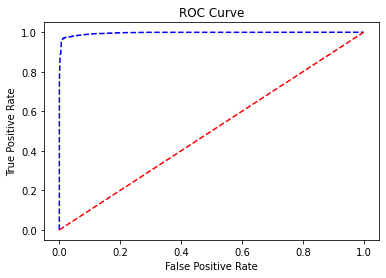

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Logistic Regression Accuracy Comparision

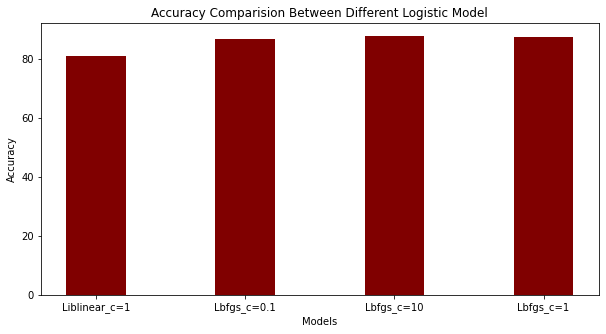

In [ ]:
data = {'Liblinear_c=1':0.8115*100, 'Lbfgs_c=0.1':0.86815*100, 'Lbfgs_c=10':0.8779*100,
        'Lbfgs_c=1':0.8762*100}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision Between Different Logistic Model")
plt.show()


# Linear SVM,c=1

In [ ]:
lsvc = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,intercept_scaling=1, loss='squared_hinge', max_iter=1000,multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [ ]:
lsvc.fit(X_train, y_train)

In [ ]:
Y_pred = lsvc.predict(X_test)

In [ ]:
compare_dataset = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})

In [ ]:
print(compare_dataset)

       Actual  Predicted
0           5          5
1           5          5
2           1          1
3           7          7
4           4          4
...       ...        ...
59995       9          1
59996       4          4
59997       8          8
59998       1          1
59999       9          9

[60000 rows x 2 columns]


In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Precision: ", metrics.precision_score(y_test, Y_pred,average='weighted'))
print("Recall: ", metrics.recall_score(y_test, Y_pred,average='weighted'))
print('F1 Score: ' ,f1_score(y_test, Y_pred,average='weighted'))

Accuracy:  0.8059166666666666
Precision:  0.8079289649312656
Recall:  0.8059166666666666
F1 Score:  0.8058940688038632


In [ ]:
y_pred_train = lsvc.predict(X_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Training Accuracy:  0.8103571428571429


In [ ]:
svm= svm.SVC(kernel='linear', max_iter=1000, random_state=0, gamma=2, C=1, probability=True) 

In [ ]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=1, gamma=2, kernel='linear', max_iter=1000, probability=True,
    random_state=0)

In [ ]:
Y_pred = svm.predict(X_test)

In [ ]:
pred2=svm.predict_proba(X_test)

In [ ]:
auc2=metrics.roc_auc_score(y_test,pred2,multi_class='ovr')
print('Area Under Curve SVM: ',auc2)

Area Under Curve SVM:  0.9458978372383303


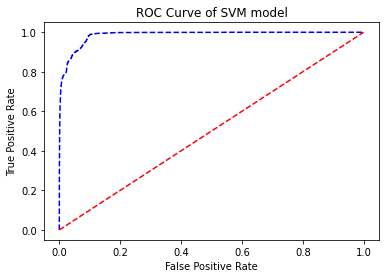

In [ ]:
fpr2,tpr2,thresh2=roc_curve(y_test,pred2[:,1],pos_label=1)
plt.figure()
plt.plot(fpr2,tpr2,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve of SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# svm with kernel rbf,c=1

In [ ]:
svm= svm.SVC(kernel='rbf', max_iter=1000, random_state=0, gamma=2, C=1, probability=True) 

In [ ]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=1, gamma=2, max_iter=1000, probability=True, random_state=0)

In [ ]:
Y_pred = svm.predict(X_test)

In [ ]:
compare_dataset = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})

In [ ]:
print(compare_dataset)

       Actual  Predicted
0           5          5
1           5          5
2           1          1
3           7          7
4           4          4
...       ...        ...
59995       9          9
59996       4          4
59997       8          8
59998       1          1
59999       9          9

[60000 rows x 2 columns]


In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Precision: ", metrics.precision_score(y_test, Y_pred,average='weighted'))
print("Recall: ", metrics.recall_score(y_test, Y_pred,average='weighted'))

Accuracy:  0.89825
Precision:  0.9125470268361942
Recall:  0.89825


In [ ]:
y_pred_train = svm.predict(X_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Training Accuracy:  0.9210214285714285


In [ ]:
pred2=svm.predict_proba(X_test)

In [ ]:
auc2=metrics.roc_auc_score(y_test,pred2,multi_class='ovr')
print('Area Under Curve SVM: ',auc2)

Area Under Curve SVM:  0.9237573167823048


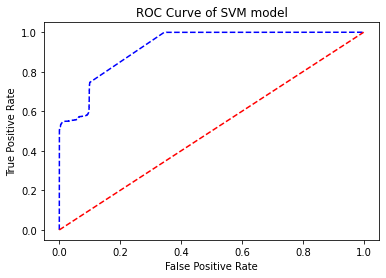

In [ ]:
fpr2,tpr2,thresh2=roc_curve(y_test,pred2[:,1],pos_label=1)
plt.figure()
plt.plot(fpr2,tpr2,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve of SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# svm with kernel rbf,c=10

In [ ]:
svm= svm.SVC(kernel='rbf', max_iter=1000, random_state=0, gamma=2, C=10, probability=True) 

In [ ]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=10, gamma=2, max_iter=1000, probability=True, random_state=0)

In [ ]:
Y_pred = svm.predict(X_test)

In [ ]:
compare_dataset = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})

In [ ]:
print(compare_dataset)

       Actual  Predicted
0           5          5
1           5          5
2           1          1
3           7          7
4           4          3
...       ...        ...
59995       9          9
59996       4          9
59997       8          8
59998       1          1
59999       9          9

[60000 rows x 2 columns]


In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Precision: ", metrics.precision_score(y_test, Y_pred,average='weighted'))
print("Recall: ", metrics.recall_score(y_test, Y_pred,average='weighted'))

Accuracy:  0.5887333333333333
Precision:  0.8657216588121813
Recall:  0.5887333333333333


In [ ]:
y_pred_train = svm.predict(X_train)

print("Training Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Training Accuracy:  0.6359571428571429


In [ ]:
pred3=svm.predict_proba(X_test)

In [ ]:
auc2=metrics.roc_auc_score(y_test,pred3,multi_class='ovr')
print('Area Under Curve SVM: ',auc2)

Area Under Curve SVM:  0.9233349050557932


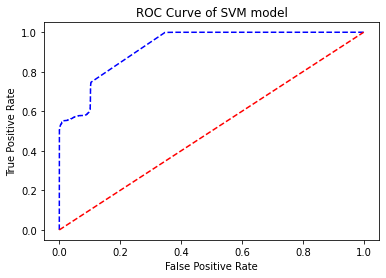

In [ ]:
fpr2,tpr2,thresh2=roc_curve(y_test,pred3[:,1],pos_label=1)
plt.figure()
plt.plot(fpr2,tpr2,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve of SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Accuracy Comparision of SVM Models

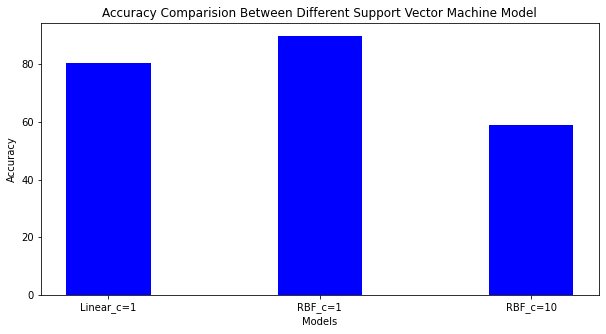

In [ ]:
data = {'Linear_c=1':0.8059*100, 'RBF_c=1':0.89825*100, 'RBF_c=10':0.5887*100}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision Between Different Support Vector Machine Model")
plt.show()


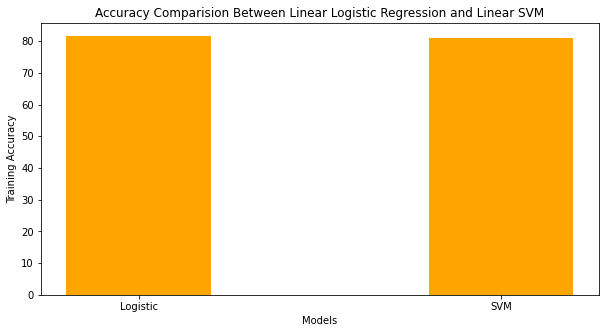

In [ ]:
data={'Logistic':0.81645*100,'SVM': 0.8103*100}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Training Accuracy")
plt.title("Accuracy Comparision Between Linear Logistic Regression and Linear SVM")
plt.show()

In [ ]:
X = np.asarray(X, dtype = float)
Y = np.asarray(y, dtype = float)

In [ ]:
X = sm.add_constant(X)

# OLS Summary train Data

In [ ]:
model = sm.OLS(Y, X) 
results = model.fit()
res=results.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     305.4
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        13:57:01   Log-Likelihood:            -4.5884e+05
No. Observations:              200000   AIC:                         9.183e+05
Df Residuals:                  199713   BIC:                         9.212e+05
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4978      0.005    837.597      0.0

# Testing data

In [ ]:
#working with testing data...
#predicting bacteria with test data
test = ss.fit_transform(test)


# Outliers of test data

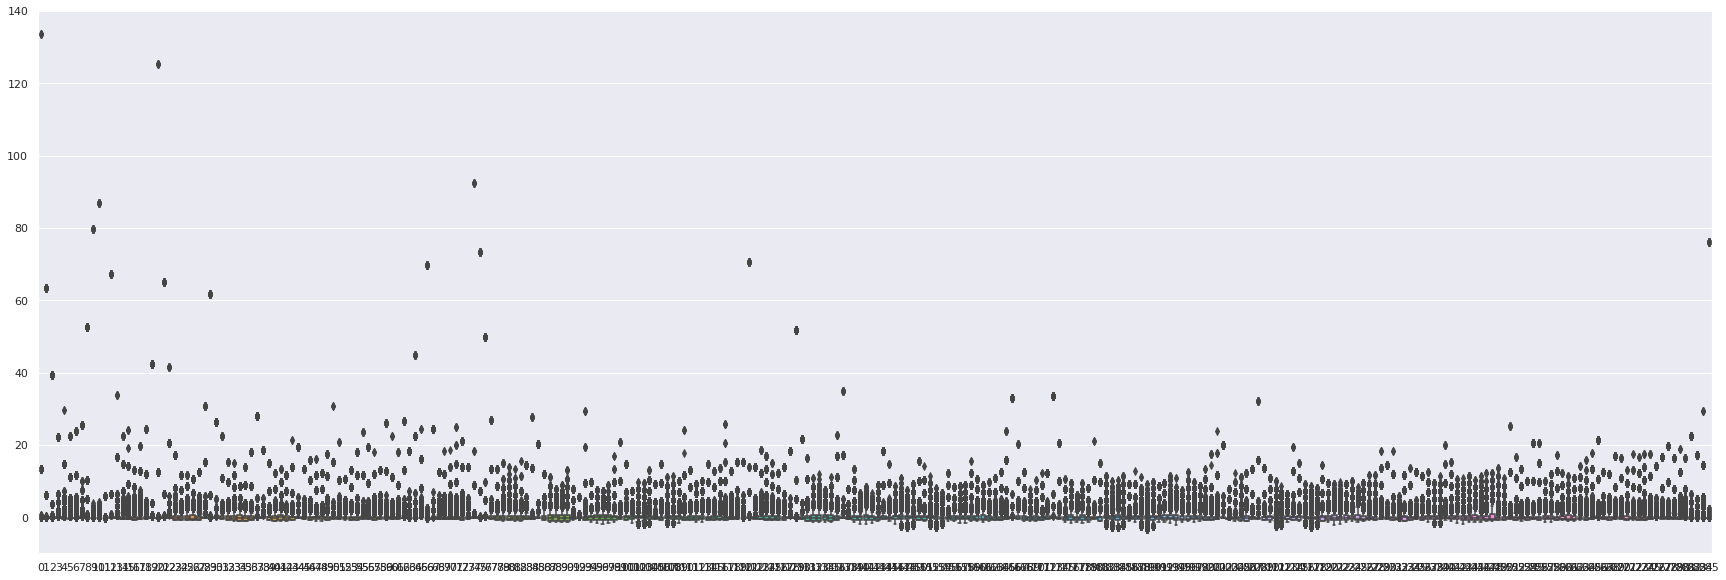

In [ ]:
sns.set(rc={"figure.figsize":(30, 10)})
boxplot = sns.boxplot(data=test)

In [ ]:
#predicting testing data with logistic regression
y_pred_testdata = log_reg.predict(test)

In [ ]:
y_pred_testdata

array([6, 6, 2, 6, 7, 4, 6, 7, 8, 5, 8, 0, 5, 9, 9, 8, 1, 1, 6, 2, 2, 4,
       0, 9, 9, 4, 5, 6, 6, 9, 6, 5, 4, 1, 3, 0, 4, 8, 1, 8, 3, 8, 9, 7,
       9, 0, 4, 5, 7, 7, 3, 4, 6, 2, 2, 5, 0, 4, 7, 6, 4, 3, 3, 6, 1, 3,
       2, 9, 5, 4, 1, 3, 9, 0, 6, 0, 3, 7, 9, 3, 7, 8, 6, 4, 5, 4, 6, 4,
       4, 3, 9, 1, 9, 9, 4, 0, 0, 1, 9, 7, 8, 9, 1, 3, 8, 0, 7, 4, 2, 2,
       8, 9, 5, 9, 4, 7, 5, 5, 5, 3, 5, 7, 5, 4, 1, 7, 5, 0, 8, 3, 4, 8,
       4, 2, 4, 9, 7, 9, 8, 9, 3, 0, 1, 9, 9, 3, 9, 9, 0, 4, 6, 9, 5, 9,
       9, 4, 9, 7, 0, 5, 9, 1, 9, 1, 1, 0, 4, 7, 4, 9, 1, 1, 7, 7, 0, 9,
       3, 0, 9, 9, 1, 5, 3, 7, 3, 4, 8, 2, 3, 9, 4, 8, 4, 5, 3, 4, 9, 5,
       9, 2, 5, 5, 8, 9, 0, 1, 2, 9, 4, 2, 9, 9, 8, 9, 1, 0, 3, 9, 2, 9,
       0, 9, 9, 0, 3, 2, 9, 4, 4, 3, 3, 5, 2, 7, 2, 2, 7, 4, 3, 6, 5, 5,
       6, 2, 4, 5, 9, 6, 5, 9, 1, 9, 6, 0, 3, 9, 7, 7, 0, 1, 9, 6, 0, 9,
       6, 9, 4, 2, 3, 1, 6, 5, 3, 8, 0, 7, 7, 5, 7, 6, 5, 6, 1, 6, 0, 4,
       4, 0, 6, 6, 2, 0, 6, 5, 9, 6, 9, 3, 5, 8, 8,

In [ ]:
#inversing for categorical values(Bacteria)
prediction = le.inverse_transform(y_pred_testdata)

In [ ]:
prediction

array(['Salmonella_enterica', 'Salmonella_enterica', 'Enterococcus_hirae',
       'Salmonella_enterica', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Salmonella_enterica',
       'Staphylococcus_aureus', 'Streptococcus_pneumoniae',
       'Klebsiella_pneumoniae', 'Streptococcus_pneumoniae',
       'Bacteroides_fragilis', 'Klebsiella_pneumoniae',
       'Streptococcus_pyogenes', 'Streptococcus_pyogenes',
       'Streptococcus_pneumoniae', 'Campylobacter_jejuni',
       'Campylobacter_jejuni', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Enterococcus_hirae',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Streptococcus_pyogenes', 'Streptococcus_pyogenes',
       'Escherichia_fergusonii', 'Klebsiella_pneumoniae',
       'Salmonella_enterica', 'Salmonella_enterica',
       'Streptococcus_pyogenes', 'Salmonella_enterica',
       'Klebsiella_pneumoniae', 'Escherichia_fergusonii',
       'Campylobacter_jejuni', 'Escherichia_coli', 'Bacteroides_fragilis',

In [ ]:
row_id_test


0        200000
1        200001
2        200002
3        200003
4        200004
          ...  
99995    299995
99996    299996
99997    299997
99998    299998
99999    299999
Name: row_id, Length: 100000, dtype: int32

In [ ]:
bacteria_pred = pd.DataFrame({"row_id":row_id_test, "target":prediction})

# Prediction of Bacteria

In [ ]:
bacteria_pred

row_id                    target
0      200000       Salmonella_enterica
1      200001       Salmonella_enterica
2      200002        Enterococcus_hirae
3      200003       Salmonella_enterica
4      200004     Staphylococcus_aureus
...       ...                       ...
99995  299995  Streptococcus_pneumoniae
99996  299996    Streptococcus_pyogenes
99997  299997    Streptococcus_pyogenes
99998  299998      Bacteroides_fragilis
99999  299999        Enterococcus_hirae

[100000 rows x 2 columns]

# saving bacteria prediction with row id to a csv file

In [ ]:
submission = pd.DataFrame({"row_id": row_id_test, 'target':prediction}, index=test_data.index).to_csv("submission.csv", index = False)

In [ ]:
X1=test
y1=y_pred_testdata

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 50)

# Logistic regression for test lbfgs,c=0.1

In [ ]:
log_reg_test1=LogisticRegression(multi_class = "multinomial", max_iter = 1000,solver='lbfgs', penalty='l2' , C=0.1)

In [ ]:
log_reg_test1.fit(X1_train, y1_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_test1 = log_reg_test1.predict(X1_test)

In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y1_test, y_pred_test1))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y1_test, y_pred_test1,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y1_test, y_pred_test1,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y1_test, y_pred_test1,average='macro'))


Accuracy:  0.9528666666666666

Precision:  0.953255095449698

Recall:  0.9440793885318074

F1 Score:  0.9483493418201773


In [ ]:
pred=log_reg.predict_proba(X1_test)
auc_test1=metrics.roc_auc_score(y1_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc_test1)


Area Under Curve:  0.9996603979654617


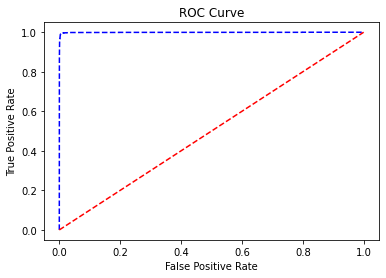

In [ ]:
y_pred_proba = log_reg_test1.predict_proba(X1_test)[::,1]
fpr,tpr,thresh=roc_curve(y1_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Logistic regression,lbfgs,c=1

In [ ]:
log_reg_test2=LogisticRegression(multi_class = "multinomial", max_iter = 1000,solver='lbfgs', penalty='l2' , C=1)

In [ ]:
log_reg_test2.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1, max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_test2 = log_reg_test1.predict(X1_test)

In [ ]:
print("\n\033[1;36;1mAccuracy:\033[0m ", metrics.accuracy_score(y1_test, y_pred_test2))
print("\n\033[1;36;1mPrecision:\033[0m ", metrics.precision_score(y1_test, y_pred_test2,average='macro'))
print("\n\033[1;36;1mRecall:\033[0m ", metrics.recall_score(y1_test, y_pred_test2,average='macro'))
print('\n\033[1;36;1mF1 Score:\033[0m ' ,f1_score(y1_test, y_pred_test2,average='macro'))


Accuracy:  0.9528666666666666

Precision:  0.953255095449698

Recall:  0.9440793885318074

F1 Score:  0.9483493418201773


In [ ]:
y_pred_test_training_accuracy = log_reg_test2.predict(X1_train)

print("Testing Accuracy: ", metrics.accuracy_score(y1_train, y_pred_test_training_accuracy))

Testing Accuracy:  0.9870285714285715


In [ ]:
pred=log_reg.predict_proba(X1_test)
auc_test2=metrics.roc_auc_score(y1_test,pred,multi_class='ovr')
print('\n\033[1;36;1mArea Under Curve:\033[0m ',auc_test2)


Area Under Curve:  0.9996603979654617


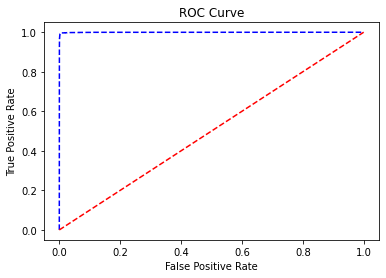

In [ ]:
y_pred_proba = log_reg_test2.predict_proba(X1_test)[::,1]
fpr,tpr,thresh=roc_curve(y1_test,y_pred_proba,pos_label=1)

plt.figure()
plt.plot(fpr,tpr,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# SVM for test data,c=1,kernel=RBF

In [ ]:
svm= svm.SVC(kernel='rbf', max_iter=1000, random_state=0, gamma=2, C=1, probability=True) 

In [ ]:
svm.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=1, gamma=2, max_iter=1000, probability=True, random_state=0)

In [ ]:
Y_pred1 = svm.predict(X1_test)

In [ ]:
compare_dataset = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': Y_pred1.flatten()})

In [ ]:
print(compare_dataset)

       Actual  Predicted
0           5          5
1           6          6
2           7          7
3           9          9
4           4          4
...       ...        ...
29995       0          0
29996       6          6
29997       9          9
29998       0          0
29999       7          7

[30000 rows x 2 columns]


In [ ]:
print("Accuracy: ", metrics.accuracy_score(y1_test, Y_pred1))
print("Precision: ", metrics.precision_score(y1_test, Y_pred1,average='weighted'))
print("Recall: ", metrics.recall_score(y1_test, Y_pred1,average='weighted'))

Accuracy:  0.8783333333333333
Precision:  0.8883128520579898
Recall:  0.8783333333333333


In [ ]:
y_pred_test = svm.predict(X1_train)

print("Testing Accuracy: ", metrics.accuracy_score(y1_train, y_pred_test))

Training Accuracy:  0.9357


In [ ]:
pred4=svm.predict_proba(X1_test)

In [ ]:
auc_test=metrics.roc_auc_score(y1_test,pred4,multi_class='ovr')
print('Area Under Curve SVM: ',auc_test)

Area Under Curve SVM:  0.9225702182705946


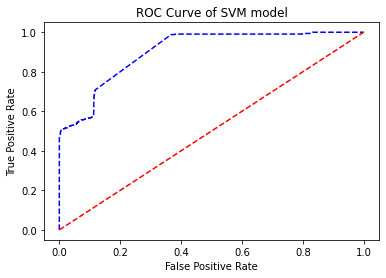

In [ ]:
fpr3,tpr3,thresh3=roc_curve(y1_test,pred4[:,1],pos_label=1)
plt.figure()
plt.plot(fpr3,tpr3,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve of SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# SVM for testing data ,C=0.1

In [ ]:
svm= svm.SVC(kernel='rbf', max_iter=1000, random_state=0, gamma=2, C=0.1, probability=True) 

In [ ]:
svm.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=0.1, gamma=2, max_iter=1000, probability=True, random_state=0)

In [ ]:
Y_pred1 = svm.predict(X1_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y1_test, Y_pred1))
print("Precision: ", metrics.precision_score(y1_test, Y_pred1,average='weighted'))
print("Recall: ", metrics.recall_score(y1_test, Y_pred1,average='weighted'))

Accuracy:  0.8762
Precision:  0.8861621242140609
Recall:  0.8762


In [ ]:
y_pred_test = svm.predict(X1_train)

print("Testing Accuracy: ", metrics.accuracy_score(y1_train, y_pred_test))

Testing Accuracy:  0.9293571428571429


In [ ]:
pred4=svm.predict_proba(X1_test)

In [ ]:
auc_test=metrics.roc_auc_score(y1_test,pred4,multi_class='ovr')
print('Area Under Curve SVM: ',auc_test)

Area Under Curve SVM:  0.9050202197724084


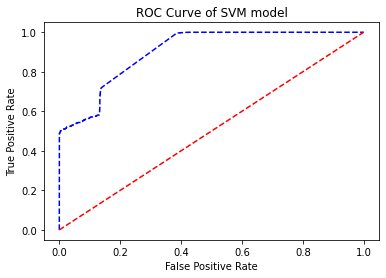

In [ ]:
fpr3,tpr3,thresh3=roc_curve(y1_test,pred4[:,1],pos_label=1)
plt.figure()
plt.plot(fpr3,tpr3,linestyle='--',color='blue')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve of SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

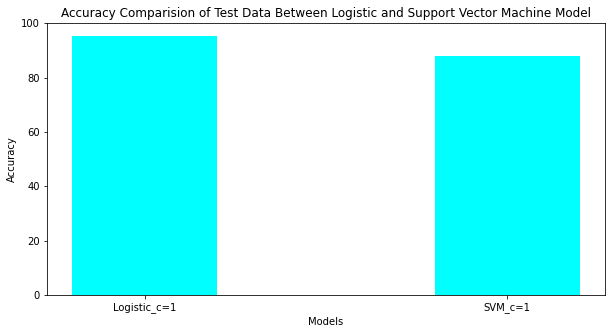

In [ ]:
data = {'Logistic_c=1':0.9528*100, 'SVM_c=1':0.8783*100,}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='cyan',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision of Test Data Between Logistic and Support Vector Machine Model")
plt.show()

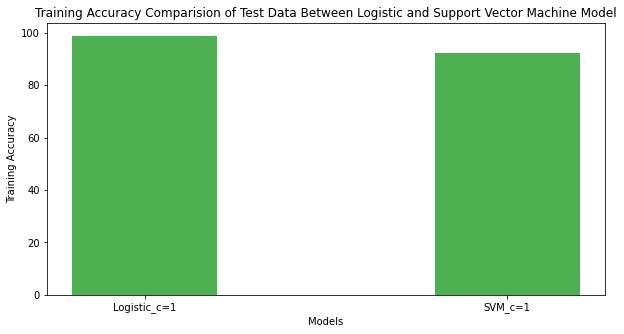

In [ ]:
data = {'Logistic_c=1':0.9870*100, 'SVM_c=1':0.9225*100,}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='#4CAF50',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Comparision of Test Data Between Logistic and Support Vector Machine Model")
plt.show()